# Model Stress from iot data

## Import and clean up the data

In [1]:
 import pandas as pd

In [2]:
mental_health_data = pd.read_csv('./university_mental_health_iot_dataset.csv', sep=r'\s*,\s*', engine='python')
mental_health_data

,timestamp,location_id,temperature_celsius,humidity_percent,air_quality_index,noise_level_db,lighting_lux,crowd_density,stress_level,sleep_hours,mood_score,mental_health_status
0,2024-05-01 08:00:00,104,24.328184,62.987529,67,54.429034,323.015836,45,23,7.22,2.3,0
1,2024-05-01 08:15:00,105,26.177300,52.482089,77,62.336451,412.211259,17,54,5.02,1.7,1
2,2024-05-01 08:30:00,103,25.443028,55.736424,120,51.967691,386.972786,35,39,4.96,2.9,0
3,2024-05-01 08:45:00,105,24.671652,71.484457,131,54.658851,339.056874,25,39,8.24,0.0,0
4,2024-05-01 09:00:00,105,21.628577,61.132704,81,60.623440,341.460697,36,18,6.61,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-05-11 16:45:00,102,19.310428,48.623143,87,67.353487,255.170779,15,24,7.43,1.5,0
996,2024-05-11 17:00:00,101,26.649329,57.985085,142,62.199245,242.881375,45,57,4.36,-1.1,1
997,2024-05-11 17:15:00,101,23.766488,59.934787,132,41.500140,245.404865,33,45,5.96,1.1,1
998,2024-05-11 17:30:00,104,23.458560,65.987944,117,79.642124,276.588771,51,50,7.28,2.3,1


In [3]:
mental_health_data.describe(include='all')

,timestamp,location_id,temperature_celsius,humidity_percent,air_quality_index,noise_level_db,lighting_lux,crowd_density,stress_level,sleep_hours,mood_score,mental_health_status
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2024-05-11 17:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,103.004000,24.208457,60.189320,85.446000,54.722387,301.500435,31.736000,39.086000,6.423930,1.641000,0.501000
std,NaN,1.433192,3.012801,9.747296,37.970526,10.051077,48.873955,15.757366,13.416057,1.170662,1.016076,0.512115
min,NaN,101.000000,15.235949,29.804878,20.000000,24.540712,155.222115,5.000000,1.000000,3.000000,-2.200000,0.000000
25%,NaN,102.000000,22.183079,53.726462,51.000000,47.853538,267.386280,18.000000,29.000000,5.650000,1.000000,0.000000
50%,NaN,103.000000,24.168562,60.048989,86.000000,54.777010,300.471291,31.000000,39.000000,6.440000,1.700000,0.000000
75%,NaN,104.000000,26.125555,66.726456,119.000000,61.794293,334.167401,46.000000,49.000000,7.225000,2.500000,1.000000


In [4]:
column_types = mental_health_data.dtypes
print(column_types)

timestamp                object
location_id               int64
temperature_celsius     float64
humidity_percent        float64
air_quality_index         int64
noise_level_db          float64
lighting_lux            float64
crowd_density             int64
stress_level              int64
sleep_hours             float64
mood_score              float64
mental_health_status      int64
dtype: object


In [5]:
mental_health_data = mental_health_data.drop('timestamp', axis=1)

In [6]:
mental_health_data = pd.get_dummies(mental_health_data, columns=['location_id'])

In [7]:
mental_health_data

,temperature_celsius,humidity_percent,air_quality_index,noise_level_db,lighting_lux,crowd_density,stress_level,sleep_hours,mood_score,mental_health_status,location_id_101,location_id_102,location_id_103,location_id_104,location_id_105
0,24.328184,62.987529,67,54.429034,323.015836,45,23,7.22,2.3,0,False,False,False,True,False
1,26.177300,52.482089,77,62.336451,412.211259,17,54,5.02,1.7,1,False,False,False,False,True
2,25.443028,55.736424,120,51.967691,386.972786,35,39,4.96,2.9,0,False,False,True,False,False
3,24.671652,71.484457,131,54.658851,339.056874,25,39,8.24,0.0,0,False,False,False,False,True
4,21.628577,61.132704,81,60.623440,341.460697,36,18,6.61,3.0,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19.310428,48.623143,87,67.353487,255.170779,15,24,7.43,1.5,0,False,True,False,False,False
996,26.649329,57.985085,142,62.199245,242.881375,45,57,4.36,-1.1,1,True,False,False,False,False
997,23.766488,59.934787,132,41.500140,245.404865,33,45,5.96,1.1,1,True,False,False,False,False
998,23.458560,65.987944,117,79.642124,276.588771,51,50,7.28,2.3,1,False,False,False,True,False


In [8]:
mental_health_data[mental_health_data.isnull().any(axis=1)]

,temperature_celsius,humidity_percent,air_quality_index,noise_level_db,lighting_lux,crowd_density,stress_level,sleep_hours,mood_score,mental_health_status,location_id_101,location_id_102,location_id_103,location_id_104,location_id_105


# Modeling with linear regression

In [9]:
from sklearn.model_selection import train_test_split
X = mental_health_data.drop('stress_level', axis=1)

# Taking the labels (price)
Y = mental_health_data['stress_level']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
linear_model.score(X_train, Y_train)

0.7609857925077792

In [12]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

mood_score              -1.603907
sleep_hours             -1.450105
location_id_105         -1.112709
location_id_101         -0.028183
lighting_lux             0.000775
temperature_celsius      0.027789
humidity_percent         0.032571
air_quality_index        0.074900
crowd_density            0.076395
noise_level_db           0.153504
location_id_102          0.208278
location_id_103          0.303409
location_id_104          0.629204
mental_health_status    15.741758
dtype: float64


In [13]:
y_predict = linear_model.predict(x_test)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


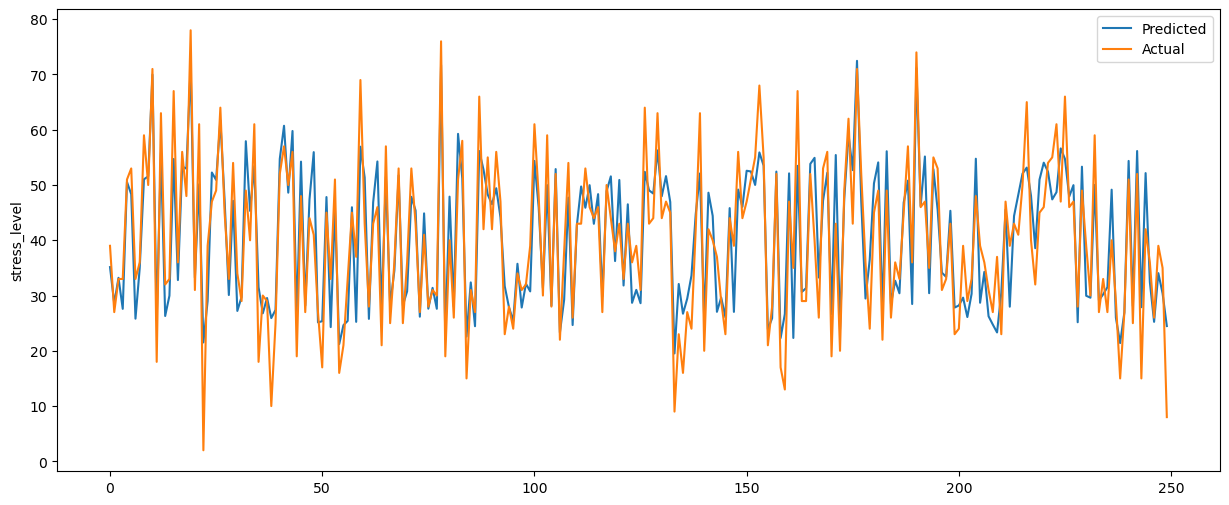

In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('stress_level')

plt.legend()
plt.show()

#### R-square score
For our linear regression model, how well do the features describe the stress level?

In [15]:
r_square = linear_model.score(x_test, y_test)
r_square

0.789737176363153

## Root of Mean Squared Error

In [16]:
from sklearn.metrics import mean_squared_error
import math
linear_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(linear_model_mse)

6.472774165056618

### Lasso Regression


### Create a pipeline to normalize and perform lasso regression

In [17]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lasso_step = Lasso(alpha=.5)
pipeline = make_pipeline(StandardScaler(), lasso_step)
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.5))])

In [18]:
pipeline.score(X_train, Y_train)

0.7528824368046915

In [19]:
coefficients = pipeline.named_steps['lasso'].coef_

coef = pd.Series(coefficients, predictors).sort_values()
print(coef)

sleep_hours            -1.401001
mood_score             -1.361624
location_id_105        -0.003618
temperature_celsius     0.000000
lighting_lux            0.000000
location_id_103         0.000000
location_id_101        -0.000000
humidity_percent        0.000000
location_id_104         0.000000
location_id_102         0.000000
crowd_density           0.732658
noise_level_db          1.031443
air_quality_index       2.457967
mental_health_status    7.938769
dtype: float64


### Show the model's fit against test data

In [20]:
y_predict = pipeline.predict(x_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


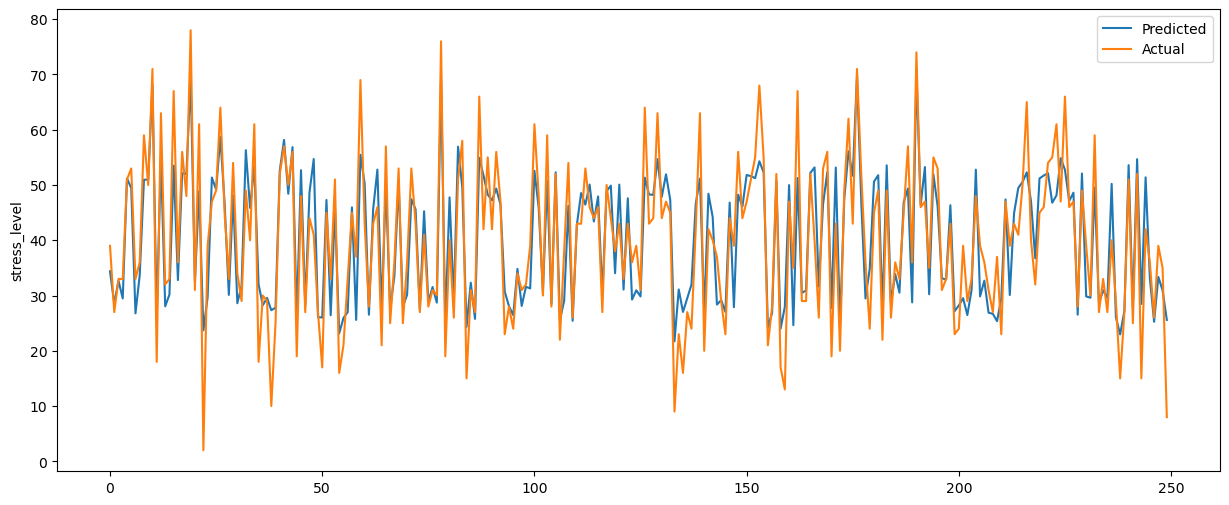

In [21]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('stress_level')

plt.legend()
plt.show()

Calculate root of mean squared error

In [22]:
from sklearn.metrics import mean_squared_error
import math

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse
math.sqrt(linear_model_mse)

6.47406841950187

## Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ridge_step = Ridge(alpha=.5)
pipeline_ridge = make_pipeline(StandardScaler(), ridge_step)
pipeline_ridge.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.5))])

#### Check R-square on training data

In [24]:
pipeline_ridge.score(X_train, Y_train)

0.7609856236140853

In [25]:
coefficients = pipeline_ridge.named_steps['ridge'].coef_

coef = pd.Series(coefficients, predictors).sort_values()
print(coef)

sleep_hours            -1.713476
mood_score             -1.638068
location_id_105        -0.444165
location_id_101        -0.012247
lighting_lux            0.037827
location_id_102         0.080835
temperature_celsius     0.082126
location_id_103         0.117519
location_id_104         0.256830
humidity_percent        0.312594
crowd_density           1.195423
noise_level_db          1.544817
air_quality_index       2.834366
mental_health_status    7.905490
dtype: float64


### Show the model's fit against test data

In [26]:
y_predict = pipeline_ridge.predict(x_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


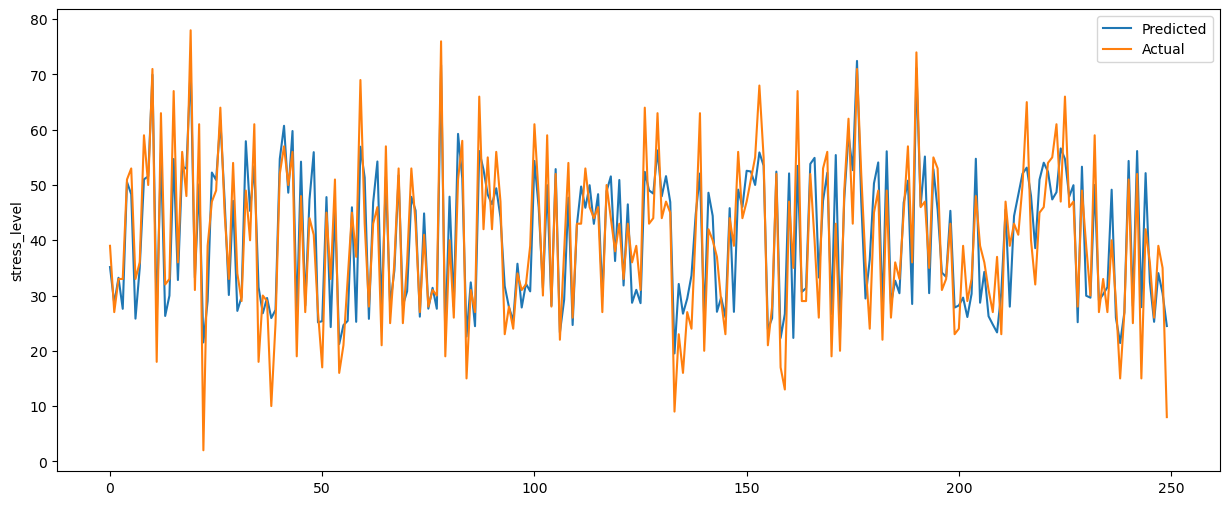

In [27]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('stress_level')

plt.legend()
plt.show()

Calculate root of mean squared error

In [28]:
linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse
math.sqrt(linear_model_mse)

6.4726813488073285